In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [4]:
#generating synthetic data 
np.random.seed(42)
X = np.random.randn(20,2)
y = np.where(X[:,0] + X[:,1] > 0, 1, -1)

#fit svm model with linear kernel
C_value = 1e6
clf = svm.SVC(kernel='linear', C=C_value)
clf.fit(X,y)

SVC(C=1000000.0, kernel='linear')

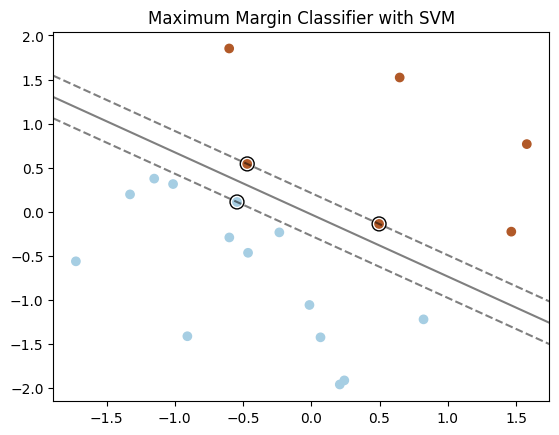

In [11]:
#plotting the decision boundary and support vectors
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Paired)
ax = plt.gca()

xlim = ax.get_xlim()
ylim = ax.get_ylim()

#create grod tp evaluate model
xx, yy = np.meshgrid(np.linspace(xlim[0],xlim[1],50),np.linspace(ylim[0],ylim[1],50))

#plot decision function for each datapoint in the grid
Z = clf.decision_function(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
#plot decision boundary and margins
ax.contour(xx,yy,Z,colors='k',levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])
#higlight support vectors
ax.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=100,linewidth=1,facecolors='none',edgecolors='k')
plt.title("Maximum Margin Classifier with SVM")
plt.show()